# Random numbers

In [1]:
from py5canvas import *

We have already used the `random()` function to generate "random" values (that is always different values). This notebook has some additional explanations and functions that you can use to add "chance" to your code and create unpredictable results

## Pseudorandom Numbers

From Daniel Shiffman's [chapter 0 of the Nature of Code](https://natureofcode.com/random/)
> The random numbers from the `random()` function aren’t truly random; instead, they’re pseudorandom because they’re the result of a mathematical function that merely simulates randomness. This function would yield a pattern over time and thus stop seeming to be random. That time period is so long, however, that random() is random enough for the examples in this book.

The way in which "pseudo" random numbers are generated when you call `random` is based on a ["pseudo-random number generator" (PRNG)](https://en.wikipedia.org/wiki/Pseudorandom_number_generator). A PRNG starts from an intial seed value, and every time you use the `random` function, it replaces the seed with a new value that is based on a calculation. A very naive example of this could be something like this:

In [4]:
seed = 30

def my_random():
    global seed
    seed = (seed+5669)%256
    return seed/256

for i in range(10):
    print(my_random())

0.26171875
0.40625
0.55078125
0.6953125
0.83984375
0.984375
0.12890625
0.2734375
0.41796875
0.5625


This uses the `%` modulo operator to always have numbers between `0` and `256`. Every time we run the cell above, it will return exactly the same sequence of numbers, but the sequence will change if we change the value of `seed`. To set the seed for `random` we can use the `random_seed(value)` function, which will result in the same sequence of random values every time you use `random()`.

# Uniform and non-uniform random numbers
The `random` function gives us "uniformly distributed" random numbers, meaning that we have equal probability of getting any number within the range that we specify. A probability distribution is a function (in the mathematical sense, like `sin`) that describes the probability for a certain event or number to occur. If we plot the uniform distribution we get a "box"

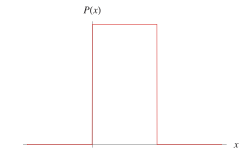

Where any value on the `x` axis inside the box has equal probability (the height of the box) of occurring. If we draw many circles with a random horizontal position we can get a feel of this:

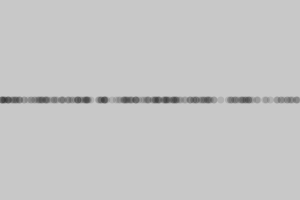

In [72]:
create_canvas(300, 200)
fill(0, 30)
no_stroke()
for i in range(200):
    circle(random(0, width), height/2, 7)
show()


We can also generate random vectors by specifying a third parameter. Using `2` will give us a uniform random *vector* with two components

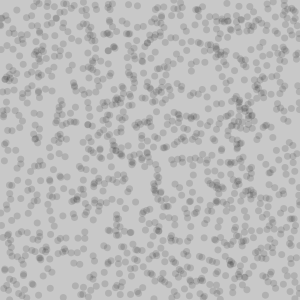

In [73]:
create_canvas(300, 300)
fill(0, 30)
no_stroke()
for i in range(1200):
    circle(random(0, width, 2), 7)
show()

## Gaussian random numbers
It is common to desire random numbers that have a higher probability of being distributed around a given value. One way to do this is to use the famous [normal or Gaussian probability distribution](https://en.wikipedia.org/wiki/Normal_distribution). It is attributed to [Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss), also known as "the prince of mathematics" for his huge number of contributions to maths.

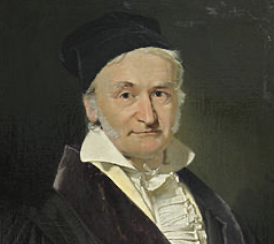

The Gaussian has a "bell shape" 

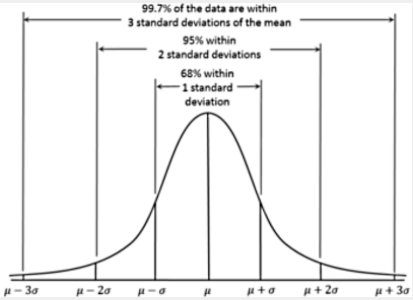

The distribution is centered at the **mean** (often written with the Greek letter "mu" $\mu$) and spreads outward with an extent determined by its **standard deviation** (often written as "sigma" $\sigma$ ). The standard deviation determine how wide the bell is. 

Similarly to `random()` we can use `random_gaussian()` but this gives us numbers with mean `0` and standard deviation `1`. This means we’re more likely to pick numbers near zero, and it’s very unlikely to get values lower than `-3` or higher than `3`.

This means that we have a higher probability of picking numbers near zero and a near zero probability of getting numbers lower than `-3` or higher than `3`. We can specify the mean and standard deviation as the first two parameters of `random_gaussian`, so if we repeat our earlier examples we can view how this looks.

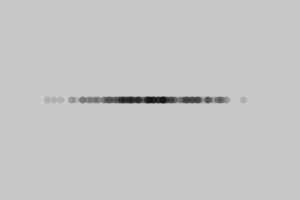

In [74]:
create_canvas(300, 200)
fill(0, 30)
no_stroke()
for i in range(200):
    mu = width/2 # Center x of canvas
    sigma = (width/2)/4
    circle(random_gaussian(mu, sigma), height/2, 7)
show()

Keep in mind that `random_gaussian` will return values *smaller or greater* than the mean. So `random_gaussian()` without parameters will also give negative numbers.

Similarly to `random` we can use `random_gaussian` to create vectors by adding a third parameter:

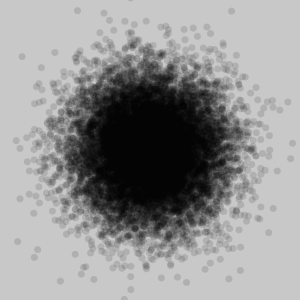

In [3]:
create_canvas(300, 300)
fill(0, 30)
no_stroke()
translate(center)
for i in range(15200):
    sigma = (width/2)/4
    circle(random_gaussian(0, sigma, 2), 7)
show()

This can be fun to use for creating "spray effects" or generally patterns that decay from a certain position.